In [1]:
import numpy as np
import pandas as pd

from etl import load_monsters, _mechanics, _stats, _flavor, _skills, get_monster_df

# Load data

In [2]:
monsters, ogl = load_monsters()
monster_df = get_monster_df(monsters)

In [3]:
monster_df[_mechanics].head()

,challenge_rating,armor_class,hit_dice,hit_points,condition_immunities,damage_immunities,damage_resistances,damage_vulnerabilities,actions,reactions,legendary_actions,special_abilities,size,speed,senses
name,,,,,,,,,,,,,,,
Aboleth,10.00,17,18d10,135,,,,,"[{'name': 'Multiattack', 'desc': 'The aboleth ...",[],"[{'name': 'Detect', 'desc': 'The aboleth makes...","[{'name': 'Amphibious', 'desc': 'The aboleth c...",Large,"10 ft., swim 40 ft.","darkvision 120 ft., passive Perception 20"
Acolyte,0.25,10,2d8,9,,,,,"[{'name': 'Club', 'desc': 'Melee Weapon Attack...",[],[],"[{'name': 'Spellcasting', 'desc': 'The acolyte...",Medium,30 ft.,passive Perception 12
Adult Black Dragon,14.00,19,17d12,195,,acid,,,"[{'name': 'Multiattack', 'desc': 'The dragon c...",[],"[{'name': 'Detect', 'desc': 'The dragon makes ...","[{'name': 'Amphibious', 'desc': 'The dragon ca...",Huge,"40 ft., fly 80 ft., swim 40 ft.","blindsight 60 ft., darkvision 120 ft., passive..."
Adult Blue Dracolich,17.00,19,18d12,225,"charmed, exhaustion, frightened, paralyzed, po...","lightning, poison",necrotic,,"[{'name': 'Multiattack', 'desc': 'The dracolic...",[],"[{'name': 'Detect', 'desc': 'The dracolich mak...","[{'name': 'Legendary Resistance (3/Day)', 'des...",Huge,"40 ft., burrow 30 ft., fly 80 ft.","blindsight 60 ft., darkvision 120 ft., passive..."
Adult Blue Dragon,16.00,19,18d12,225,,lightning,,,"[{'name': 'Multiattack', 'desc': 'The dragon c...",[],"[{'name': 'Detect', 'desc': 'The dragon makes ...","[{'name': 'Legendary Resistance (3/Day)', 'des...",Huge,"40 ft., burrow 30 ft., fly 80 ft.","blindsight 60 ft., darkvision 120 ft., passive..."


# Initial visualizations

In [4]:
from plotnine import (aes, coord_flip, geom_boxplot, geom_abline, geom_point, geom_text, ggplot,
                      element_text, facet_grid, theme_bw, theme)

/Users/jason/Code/cr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


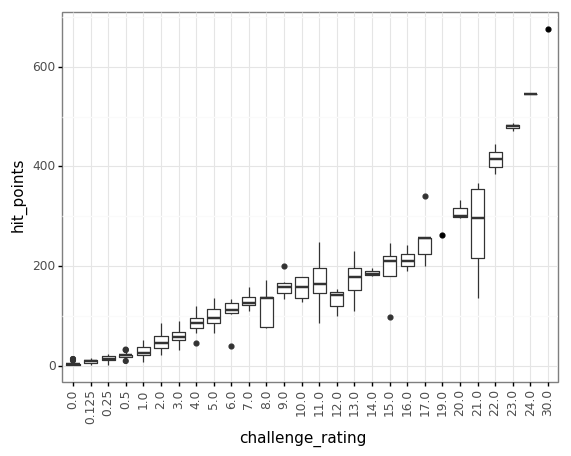

<ggplot: (-9223372036573587396)>

In [5]:
df = pd.DataFrame.copy(monster_df)
df.challenge_rating= df.challenge_rating.astype('category')

# I should automate this bit
# due to a matplotlib bug, plotnine doesn't handle categoricals with one datapoint gracefully
counts = df.challenge_rating.groupby(df.challenge_rating).count().rename('count')
singletons = [x for x in counts.index[counts == 1]]
a = df[df.challenge_rating.apply(lambda x: x not in singletons)]
b = df[df.challenge_rating.apply(lambda x: x in singletons)]

ggplot(a, aes(x='challenge_rating', y='hit_points')) + geom_boxplot() \
    + geom_point(b, aes(x='challenge_rating', y='hit_points')) + theme_bw() \
    + theme(axis_text_x=element_text(angle=90))

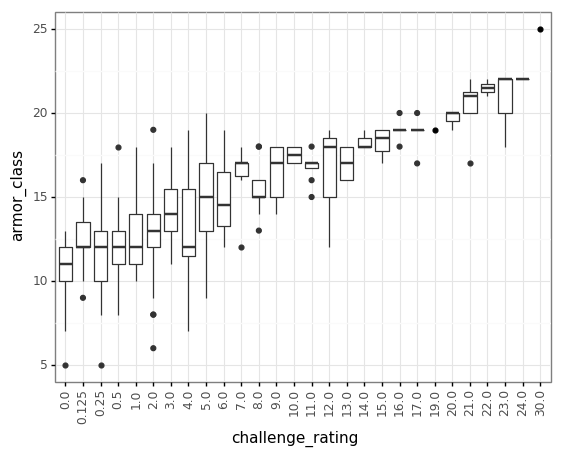

<ggplot: (281184299)>

In [6]:
ggplot(a, aes(x='challenge_rating', y='armor_class')) + geom_boxplot() \
    + geom_point(b, aes(x='challenge_rating', y='armor_class')) + theme_bw() \
    + theme(axis_text_x=element_text(angle=90))

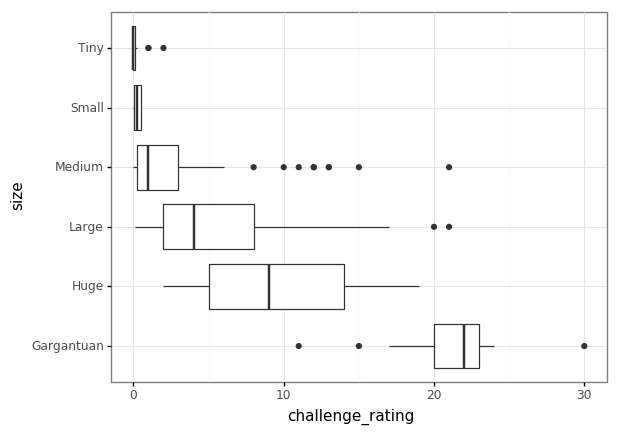

<ggplot: (281625608)>

In [7]:
ggplot(monster_df, aes(x='size', y='challenge_rating')) + geom_boxplot() + theme_bw() + coord_flip()

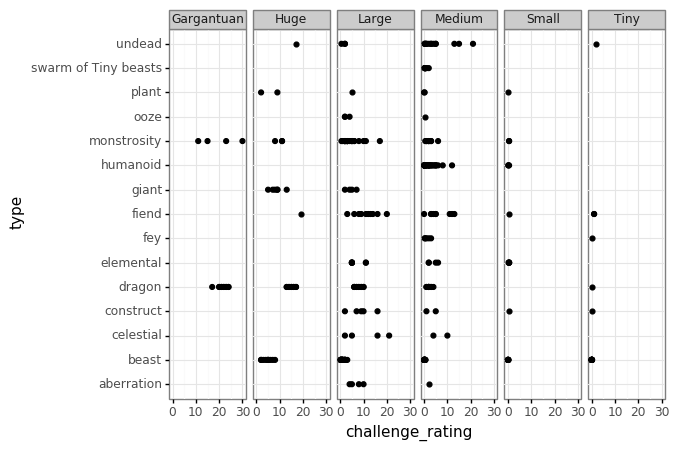

<ggplot: (281188570)>

In [8]:
ggplot(monster_df, aes(x='type', y='challenge_rating')) + geom_point() \
    + theme_bw() + coord_flip() + facet_grid('. ~ size')

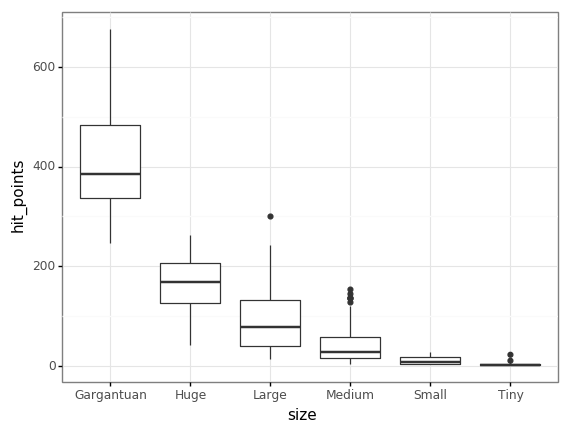

<ggplot: (281974080)>

In [9]:
ggplot(df, aes(x='size', y='hit_points')) + geom_boxplot() + theme_bw()

# Quick and simple linear regression

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y = monster_df.challenge_rating
X = monster_df[['armor_class', 'hit_points']]

lr.fit(X, y)

pred = pd.DataFrame(y)
pred['cr_hat'] = lr.predict(X)

/Users/jason/Code/cr/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [11]:
lr.coef_

array([ 0.30665931,  0.04881891])

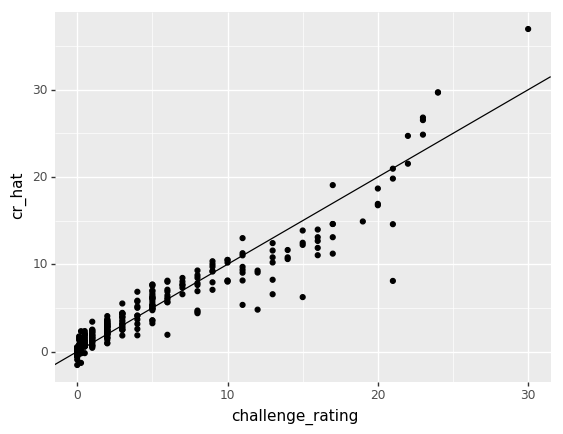

<ggplot: (-9223372036573577570)>

In [12]:

ggplot(pred, aes(x='challenge_rating', y='cr_hat')) + geom_point() + geom_abline(intercept = 0, slope = 1)

In [13]:
lr.score(X, y)

0.89929479513148114